# The below code uses model-1 and model-2 to detect and analyze specific regions in signals that correspond to plant wound responses.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score, KFold
from matplotlib.ticker import FuncFormatter

### Reading the X-Train csv files of both the models and normalizing them:

In [2]:
XTrain_variation = pd.read_csv('./xtrain/X_Train_variation.csv')
XTrain_wounded = pd.read_csv('./xtrain/X_Train_wounded.csv')

In [3]:
scaler1 = StandardScaler()
scaler2 = StandardScaler()
XTrain_variation_normal= scaler2.fit_transform(XTrain_variation)
XTrain_wounded_normal = scaler1.fit_transform(XTrain_wounded)

XTrain_variation_normal = pd.DataFrame(XTrain_variation_normal, columns=['start_m', 'max_min', 'maxi', 'mini', 'final_initial', 'final', 'initial', 'variance', 'IQR'])
XTrain_wounded_normal = pd.DataFrame(XTrain_wounded_normal, columns=['max_min', 'final_initial', 'variance', 'IQR'])

In [4]:
print(XTrain_variation_normal)
print("--------------------------------------------------------------------------")
print(XTrain_wounded_normal)

        start_m   max_min      maxi      mini  final_initial     final  \
0     -1.274813  4.025327  1.179483  0.842775      -4.158525  0.835908   
1     -1.271018  1.655558  0.957885  0.831458      -2.017383  0.824380   
2     -1.267222  1.102938  0.899313  0.821746      -1.394340  0.815709   
3     -1.263426  0.757303  0.859135  0.812037      -1.012845  0.805973   
4     -1.259631  0.819597  0.851019  0.798039      -0.997995  0.798871   
...         ...       ...       ...       ...            ...       ...   
12086  2.471462 -0.542218 -0.897022 -0.870489       0.427642 -0.878805   
12087  2.475258 -0.532419 -0.897022 -0.871382       0.463188 -0.877775   
12088  2.479053 -0.530873 -0.897485 -0.871997       0.407265 -0.880131   
12089  2.482849 -0.520906 -0.897485 -0.872906       0.412700 -0.880899   
12090  2.486645 -0.520906 -0.897485 -0.872906       0.433387 -0.880403   

        initial  variance       IQR  
0      1.149232  1.038613  1.940505  
1      0.965722  0.329480  1.553652

In [5]:
ytrain_wounded = list(np.ones(35)) + list(np.zeros(65))
ytrain_variation = list(np.ones(6681)) + list(np.zeros(5410))

In [6]:
# print(ytrain_wounded)
print(len(ytrain_wounded))
# print(ytrain_variation)
print(len(ytrain_variation))

100
12091


### Ceating and training the SVM classifier:

In [7]:
# Create an SVM classifier
svm_wounded = SVC(kernel='rbf') 
svm_variation = SVC(kernel='rbf')

# Train the classifier
svm_wounded.fit(XTrain_wounded_normal, ytrain_wounded)
svm_variation.fit(XTrain_variation_normal, ytrain_variation)

print("done")

done


### Evaluating the efficiency of both the models:

Accuracy for model1 (wounded model): 0.9667
--------------------------------------------------
Precision for model1 (wounded model): 0.9230769230769231
--------------------------------------------------
Recall for model1 (wounded model): 1.0
--------------------------------------------------
f1_score for model1 (wounded model): 0.9600000000000001
--------------------------------------------------


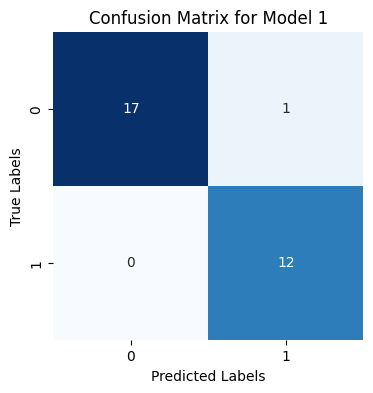

--------------------------------------------------
Accuracy scores for each fold: [1.         1.         1.         0.92857143 0.92857143]
Average Accuracy: 0.9714285714285715


In [8]:
# Some tests for model 1 after scaling
model1_xtrain, model1_xtest, model1_ytrain, model1_ytest = train_test_split(XTrain_wounded_normal, ytrain_wounded, test_size=0.3, random_state=42)
svm_classifier1 = SVC(kernel='rbf') 
svm_classifier1.fit(model1_xtrain, model1_ytrain)
model1_y_pred = svm_classifier1.predict(model1_xtest)  

accuracy_model1 = accuracy_score(model1_ytest, model1_y_pred)
print(f"Accuracy for model1 (wounded model): {accuracy_model1:.4f}")
print("--------------------------------------------------")
precision_model1 = precision_score(model1_ytest, model1_y_pred)
print(f"Precision for model1 (wounded model): {precision_model1}")
print("--------------------------------------------------")
recall_model1 = recall_score(model1_ytest, model1_y_pred)
print(f"Recall for model1 (wounded model): {recall_model1}")
print("--------------------------------------------------")
f1_model1 = f1_score(model1_ytest, model1_y_pred)
print(f"f1_score for model1 (wounded model): {f1_model1}")
print("--------------------------------------------------")

conf_matrix_model1 = confusion_matrix(model1_ytest, model1_y_pred)
# Plotting Confusion Matrix for Model 1
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_model1, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Model 1')
plt.show()

print("--------------------------------------------------")
num_folds_model1 = 5  

kf_model1 = KFold(n_splits=num_folds_model1, shuffle=True, random_state=42)

accuracy_scores_model1 = cross_val_score(svm_classifier1, model1_xtrain, model1_ytrain, cv=kf_model1, scoring='accuracy')

print("Accuracy scores for each fold:", accuracy_scores_model1)

average_accuracy_model1 = accuracy_scores_model1.mean()
print("Average Accuracy:", average_accuracy_model1)

Accuracy for model2 (variation model): 0.9639
--------------------------------------------------
Precision for model2 (variation model): 0.9625668449197861
--------------------------------------------------
Recall for model2 (variation model): 0.9734513274336283
--------------------------------------------------
f1_score for model2 (variation model): 0.9679784893669028
--------------------------------------------------


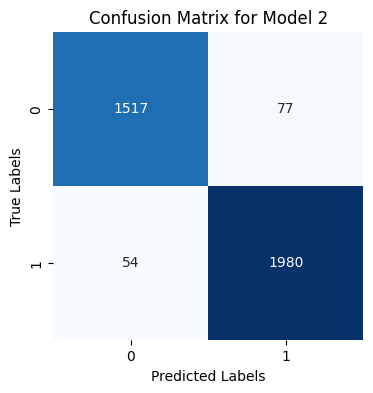

--------------------------------------------------
Accuracy scores for each fold: [0.96751329 0.96692262 0.9728293  0.96572104 0.94917258]
Average Accuracy: 0.9644317653416445


In [9]:
# Some tests for model 2 after scaling
model2_xtrain, model2_xtest, model2_ytrain, model2_ytest = train_test_split(XTrain_variation_normal, ytrain_variation, test_size=0.3, random_state=42)
svm_classifier2 = SVC(kernel='rbf') 
svm_classifier2.fit(model2_xtrain, model2_ytrain)
model2_y_pred = svm_classifier2.predict(model2_xtest) 

accuracy_model2 = accuracy_score(model2_ytest, model2_y_pred)
print(f"Accuracy for model2 (variation model): {accuracy_model2:.4f}")
print("--------------------------------------------------")
precision_model2 = precision_score(model2_ytest, model2_y_pred)
print(f"Precision for model2 (variation model): {precision_model2}")
print("--------------------------------------------------")
recall_model2 = recall_score(model2_ytest, model2_y_pred)
print(f"Recall for model2 (variation model): {recall_model2}")
print("--------------------------------------------------")
f1_model2 = f1_score(model2_ytest, model2_y_pred)
print(f"f1_score for model2 (variation model): {f1_model2}")
print("--------------------------------------------------")

conf_matrix_model2 = confusion_matrix(model2_ytest, model2_y_pred)
# Plotting Confusion Matrix for Model 2
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_model2, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Model 2')
plt.show()

print("--------------------------------------------------")
num_folds_model2 = 5  

kf_model2 = KFold(n_splits=num_folds_model2, shuffle=True, random_state=42)

accuracy_scores_model2 = cross_val_score(svm_classifier2, model2_xtrain, model2_ytrain, cv=kf_model2, scoring='accuracy')

print("Accuracy scores for each fold:", accuracy_scores_model2)

average_accuracy_model2 = accuracy_scores_model2.mean()
print("Average Accuracy:", average_accuracy_model2)

### The below is the code to classify different parts of plant signals using the above two models. Select which plant signal to be classified by changing the test_data variable below

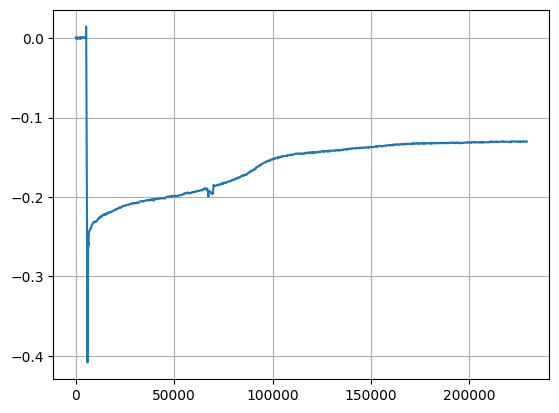

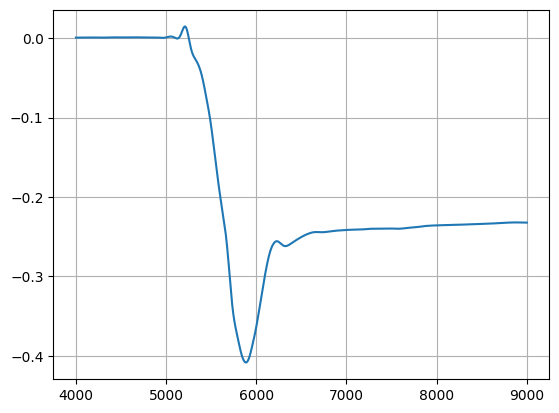

In [22]:
test_data = pd.read_csv('./Programming/smoothed_signal_file_35.csv')
plt.plot(test_data['Smoothed Voltage'])
plt.grid()
plt.figure(2)
x = wound_time
y = 5000
plt.plot(test_data['Smoothed Voltage'][x : x + y])
plt.grid()

In [23]:
j = 0
start = 0
end = test_data['Smoothed Voltage'].tail(1).index.item()
gap1 = 500
gap2 = 500
gap3 = 5000
wound_time = 0
cols = ['start_m', 'max_min', 'maxi', 'mini', 'final_initial', 'final', 'initial', 'variance', 'IQR']
Xtest = pd.DataFrame(columns=['start_m', 'max_min', 'maxi', 'mini', 'final_initial', 'final', 'initial', 'variance', 'IQR'])
num = (end - start) // gap1
wound = 0
y_pred_var_count = 0
while (start != end) and (j != num):
    subset = abs(test_data['Smoothed Voltage'][start:start + gap2])
    start_m = 0
    max_min = subset.max() - subset.min()
    maxi = subset.max()
    mini = subset.min()
    final_initial = subset.iloc[gap2-1] - subset.iloc[0]
    final = subset.iloc[gap2-1]
    initial = subset.iloc[0]
    variance = subset.var()
    Q3 = np.quantile(subset, 0.75)
    Q1 = np.quantile(subset, 0.25)
    IQR = Q3 - Q1
    
    if wound:
        subset_var = abs(test_data['Smoothed Voltage'][start:start + gap3])
        start_m = start - m
        max_min = subset_var.max() - subset_var.min()
        maxi = subset_var.max()
        mini = subset_var.min()
        final_initial = subset_var.iloc[gap3-1] - subset_var.iloc[0]
        final = subset_var.iloc[gap3-1]
        initial = subset_var.iloc[0]
        variance = subset_var.var()
        Q3 = np.quantile(subset_var, 0.75)
        Q1 = np.quantile(subset_var, 0.25)
        IQR = Q3 - Q1
        
        Xtest.loc[j] = [start_m, max_min, maxi, mini, final_initial, final, initial, variance, IQR]
        pred2 = pd.DataFrame(scaler2.transform(Xtest.iloc[[j]]), columns = cols)
        y_pred_var = svm_variation.predict(pred2)
#         print("pred2", pred2)
        if y_pred_var == 1.0:
            y_pred_var_count += 1
            
        else:
            y_pred_var_count = 0
            
    Xtest.loc[j] = [start_m, max_min, maxi, mini, final_initial, final, initial, variance, IQR]
    xt = Xtest.iloc[[j]]
    pred1 = pd.DataFrame(scaler1.transform(xt[['max_min', 'final_initial', 'variance', 'IQR']].copy()), columns = ['max_min', 'final_initial', 'variance', 'IQR'])
    y_pred_wound = svm_wounded.predict(pred1)
#     print("pred1", pred1)
    if y_pred_wound == 1.0:
        wound = 1
        wound_time = start
        wound_cycles_check = j
        m = wound_time
        
    if wound and (j - wound_cycles_check) > 20 and y_pred_var_count >= 5 :
        break
        
    start += gap1
    j += 1

print(f"The plant experienced injury at {wound_time/6000:.3f} minutes.")

# Clean up to run the next model
Xtest = Xtest.iloc[0:0]
Xtest = pd.DataFrame(columns=['start_m', 'max_min', 'maxi', 'mini', 'final_initial', 'final', 'initial', 'variance', 'IQR'])
gap1 = 500
gap2 = 5000
start = wound_time
m = wound_time
j = 0
num = (end - start) // gap1
count_var = 0
not_VP_check = 0
while (start != end) and (j != num):
    subset = abs(test_data['Smoothed Voltage'][start:start + gap2])
    start_m = start - m
    max_min = subset.max() - subset.min()
    maxi = subset.max()
    mini = subset.min()
    final_initial = subset.iloc[4999] - subset.iloc[0]
    final = subset.iloc[4999]
    initial = subset.iloc[0]
    variance = subset.var()
    Q3 = np.quantile(subset, 0.75)
    Q1 = np.quantile(subset, 0.25)
    IQR = Q3 - Q1
    
    Xtest.loc[j] = [start_m, max_min, maxi, mini, final_initial, final, initial, variance, IQR]
    pred3 = pd.DataFrame(scaler2.transform(Xtest), columns = cols)
    y_pred_model2 = svm_variation.predict(pred3)
#     print("pred3", pred3)
    
    if y_pred_model2[-1] == 1.0:
        not_VP_check = 0
        count_var += 1
        if count_var == 1:
            start_VP = start
            
    else:
        not_VP_check += 1
        
    if not_VP_check >= 5:
        end_VP = start
        break
        
    start += gap1
    j += 1
    
print(f"The variation potential occurs from {(start_VP + 500)/6000:.3f} minutes to {end_VP/6000:.3f} minutes.")

print(f"The healthy potential extends from {end_VP/6000:.3f} minutes to {end/6000:.3f} minutes.")

print(f"The recording is stopped after {end/6000:.3f} minutes.")

The plant experienced injury at 0.917 minutes.
The variation potential occurs from 1.000 minutes to 27.417 minutes.
The healthy potential extends from 27.417 minutes to 38.202 minutes.
The recording is stopped after 38.202 minutes.


### The below code is used for visualizing how the signal was classified by the ML-models

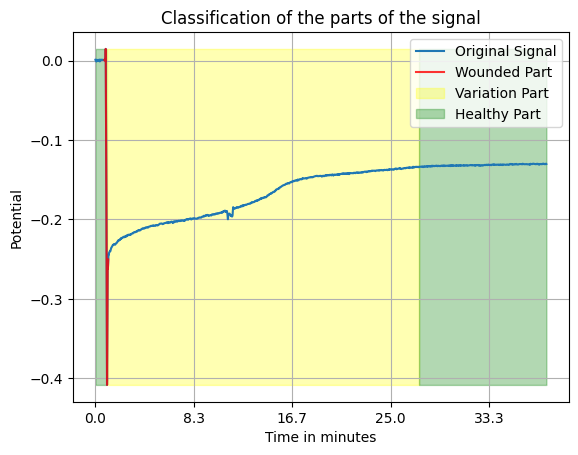

In [24]:
def format_ticks(value, pos):
    return f"{value/(100*60):.1f}"

formatter = FuncFormatter(format_ticks)

end_graph = end
plt.plot(test_data['Smoothed Voltage'][0:end_graph], label='Original Signal')
plt.plot(test_data['Smoothed Voltage'][wound_time - 1000 : start_VP + 1000], color='r', label='Wounded Part', alpha=0.8)  # Adjust alpha for transparency
plt.fill_between(range(start_VP + 500, end_VP), test_data['Smoothed Voltage'].min(), test_data['Smoothed Voltage'].max(), color='yellow', alpha=0.3, label='Variation Part')
plt.fill_between(range(end_VP, end_graph), test_data['Smoothed Voltage'].min(), test_data['Smoothed Voltage'].max(), color='green', alpha=0.3, label='Healthy Part')
plt.fill_between(range(0, wound_time), test_data['Smoothed Voltage'].min(), test_data['Smoothed Voltage'].max(), color='green', alpha=0.3)
plt.grid()
plt.legend()
plt.xlabel("Time in minutes")
plt.ylabel("Potential")
plt.title("Classification of the parts of the signal")
plt.gca().xaxis.set_major_formatter(formatter)

plt.show()